In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/archive.zip'

# Destination directory to extract files
extract_to = '/content/drive/MyDrive/archive(2)'

# Create destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    print("Extraction completed!")

Extraction completed!


In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.4 MB/s eta 0:00:00
  At

In [ ]:
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Enter label for image 1 (e.g., Early Blight, Leaf Mold, Healthy): Early blight
Enter label for image 2 (e.g., Early Blight, Leaf Mold, Healthy): Leaf mold
Enter label for image 3 (e.g., Early Blight, Leaf Mold, Healthy): Healthy


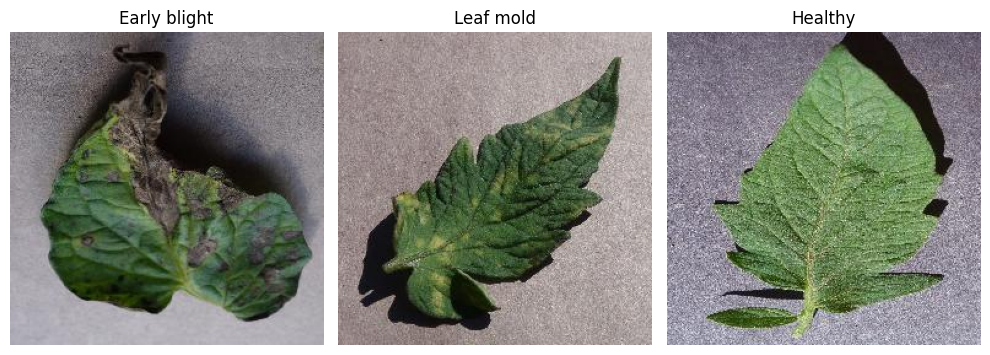

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image paths
image_paths = [
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG",
    "/content/drive/MyDrive/archive/tomato/train/Tomato___healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG"
]

# Ask user for image labels
image_labels = []
for i, path in enumerate(image_paths):
    label = input(f"Enter label for image {i+1} (e.g., Early Blight, Leaf Mold, Healthy): ")
    image_labels.append(label)

# Rescale only (normalize pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)

# Display rescaled images with user-defined labels
plt.figure(figsize=(10, 4))

for i, (img_path, label) in enumerate(zip(image_paths, image_labels)):
    # Load and process image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0)
    rescaled_img = next(datagen.flow(img_array_exp, batch_size=1))[0]

    # Display image with custom label
    plt.subplot(1, 3, i+1)
    plt.imshow(rescaled_img)
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()


''''
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/tomato/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
''''

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/tomato/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/tomato/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important!
)


Found 6000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,079,238 (225.37 MB)

 Trainable params: 59,079,238 (225.37 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


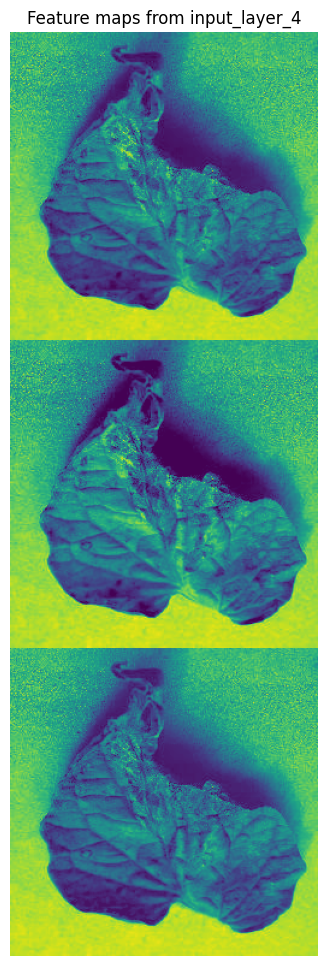

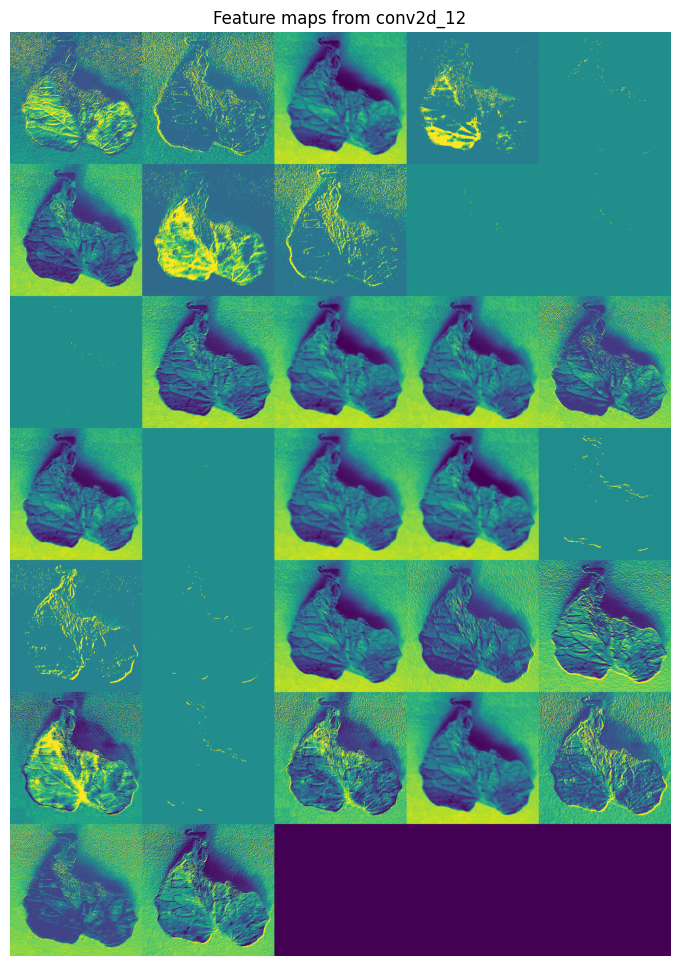

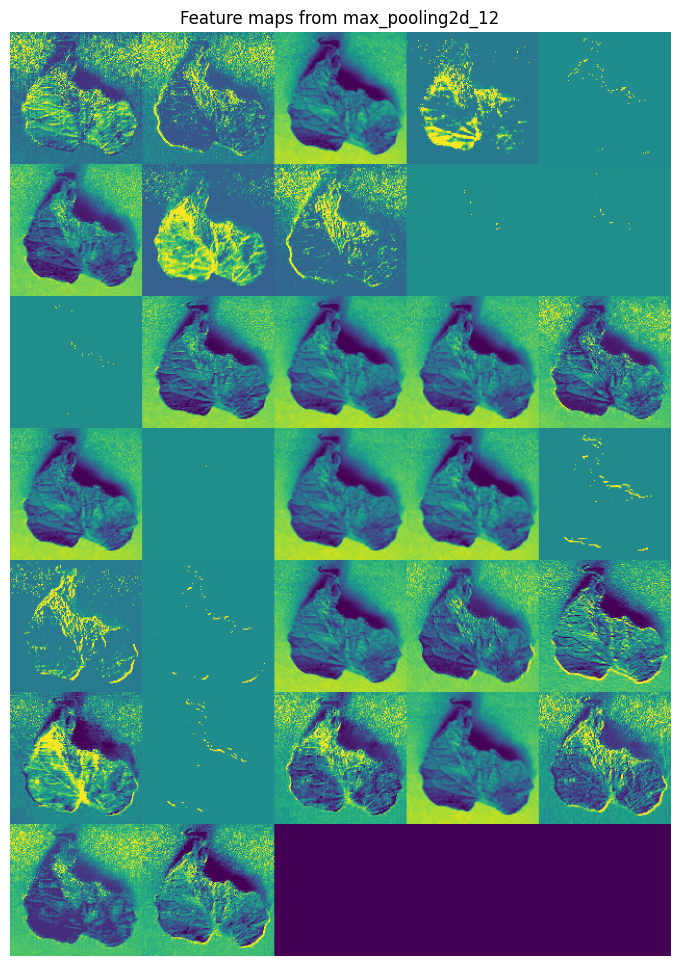

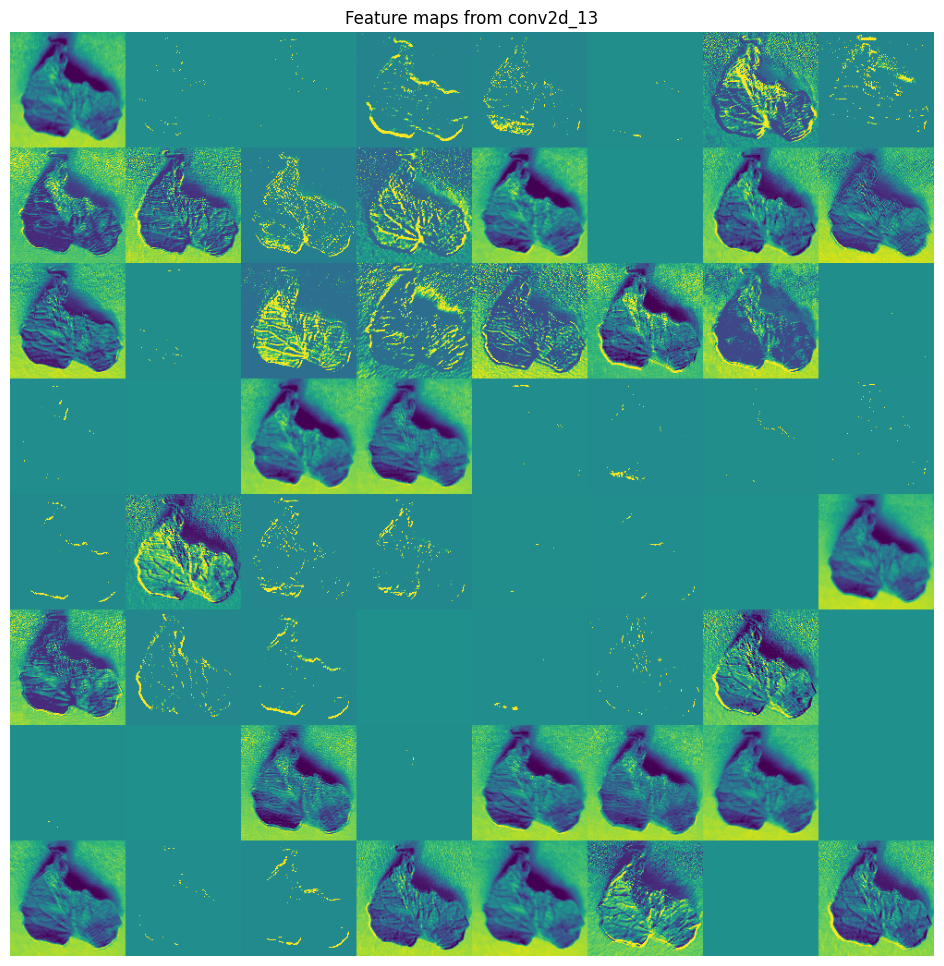

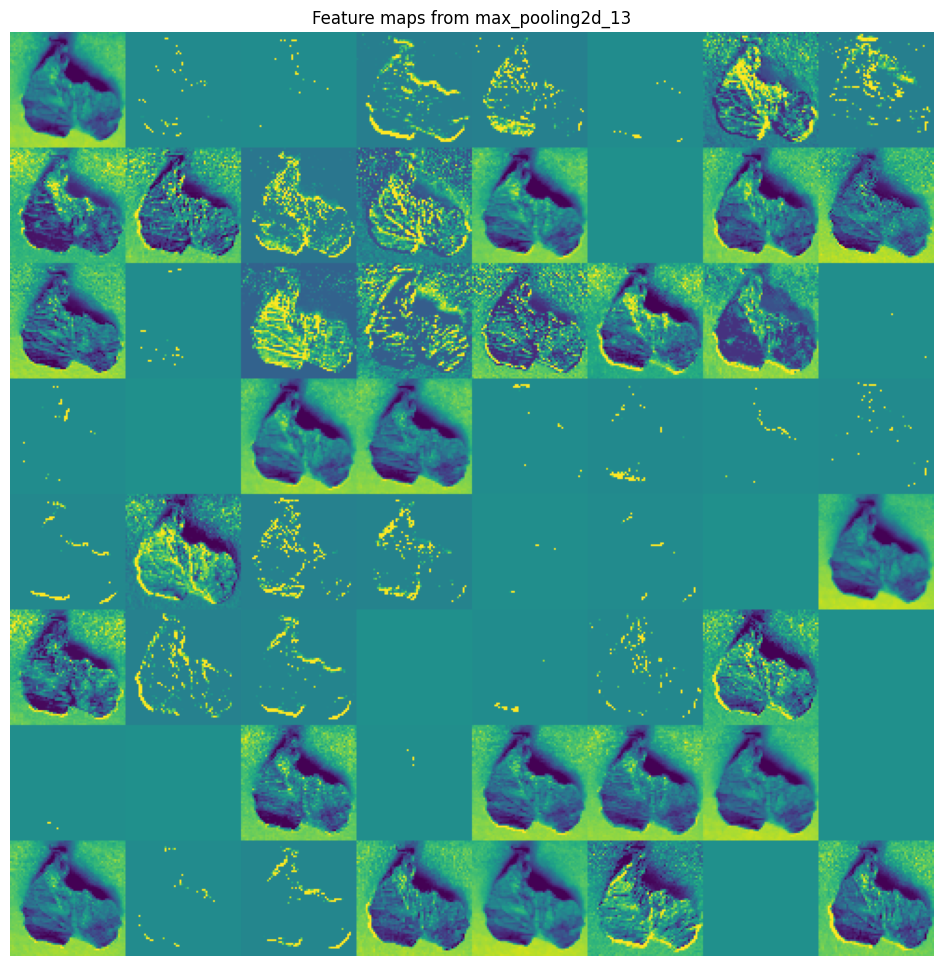

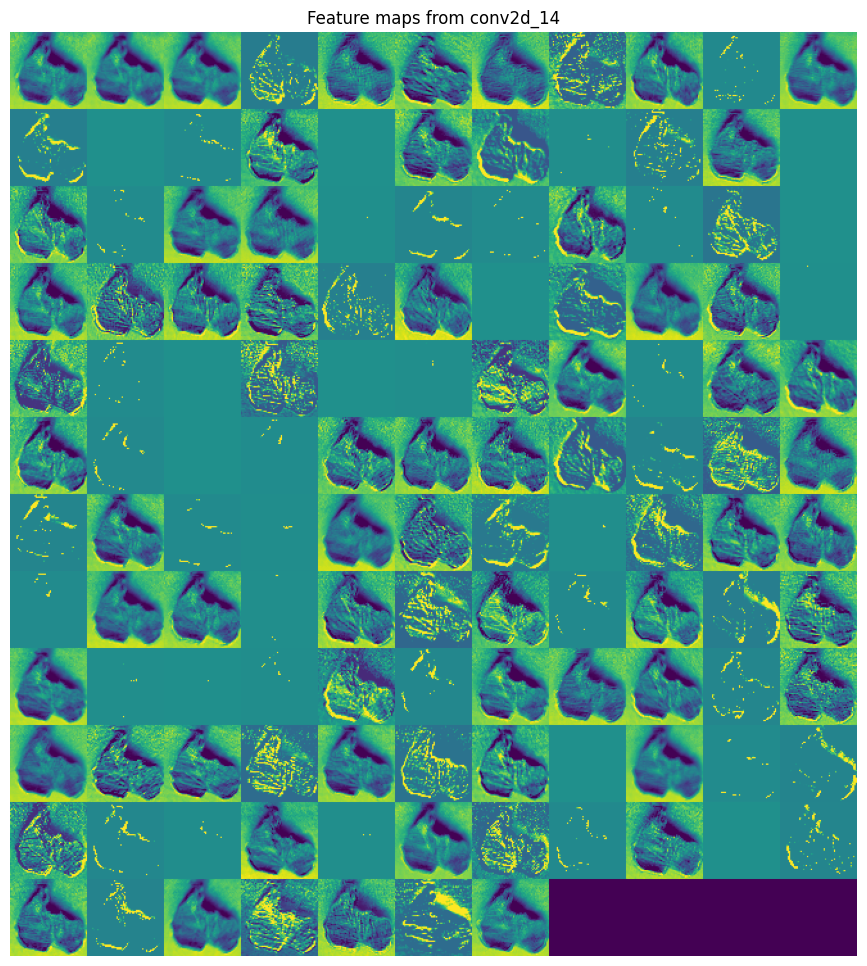

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input

inputs = Input(shape=(256, 256, 3))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Show model summary
model.summary()

# Create a new model that outputs intermediate layer activations
layer_outputs = [layer.output for layer in model.layers[:6]]  # Up to conv layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Load and preprocess image
img_path = "/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Get activations
activations = activation_model.predict(img_array)
layer_names = [layer.name for layer in model.layers[:6]]

# Function to display feature maps in a grid layout
def display_feature_maps(activation, layer_name):
    num_features = activation.shape[-1]
    size = activation.shape[1]

    n_cols = int(np.sqrt(num_features))
    n_rows = int(np.ceil(num_features / n_cols))

    display_grid = np.zeros((n_rows * size, n_cols * size))

    for i in range(num_features):
        row = i // n_cols
        col = i % n_cols
        feature_map = activation[0, :, :, i]

        # Normalize the feature map
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255)

        display_grid[row * size : (row + 1) * size,
                     col * size : (col + 1) * size] = feature_map

    plt.figure(figsize=(12, 12))
    plt.imshow(display_grid.astype('uint8'), cmap='viridis')
    plt.title(f"Feature maps from {layer_name}")
    plt.axis('off')
    plt.show()

# Display all selected layers
for layer_name, activation in zip(layer_names, activations):
    display_feature_maps(activation, layer_name)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model_cnn = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2594s 14s/step - accuracy: 0.3934 - loss: 2.0768 - val_accuracy: 0.7350 - val_loss: 0.7313
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.7504 - loss: 0.6821 - val_accuracy: 0.8000 - val_loss: 0.6145
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.8461 - loss: 0.4345 - val_accuracy: 0.8267 - val_loss: 0.5384
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.8969 - loss: 0.3025 - val_accuracy: 0.8450 - val_loss: 0.5079
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.9260 - loss: 0.2285 - val_accuracy: 0.8600 - val_loss: 0.4696


In [ ]:
# Calculate Training and Validation Accuracy & Loss
train_accuracy = model_cnn.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = model_cnn.history['val_accuracy'][-1]  # Last epoch's validation accuracy

train_loss = model_cnn.history['loss'][-1]  # Last epoch's training loss
val_loss = model_cnn.history['val_loss'][-1]  # Last epoch's validation loss

print(f"Final Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Training Accuracy: 92.57%
Final Validation Accuracy: 86.00%
Final Training Loss: 0.2173
Final Validation Loss: 0.4696


PLOT

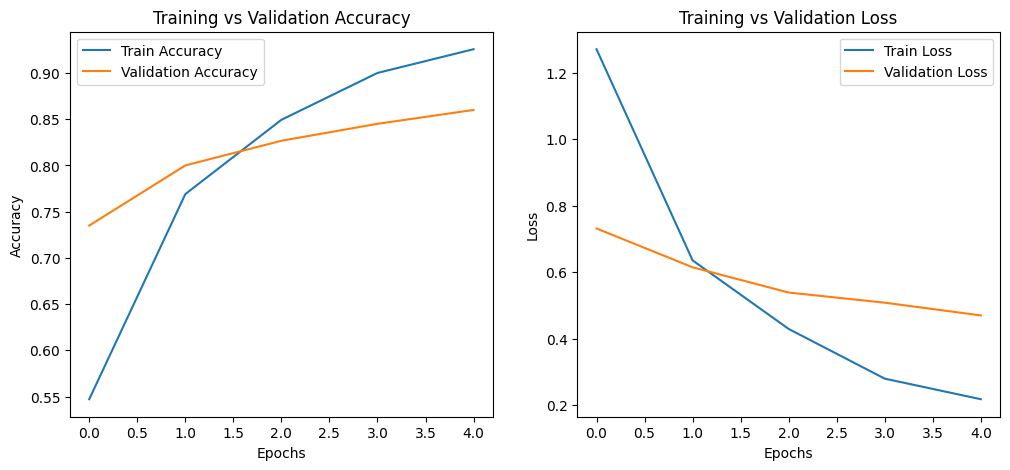

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(model_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(model_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot loss
plt.subplot(1,2,2)
plt.plot(model_cnn.history['loss'], label='Train Loss')
plt.plot(model_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


CLASSIFICATION REPORT

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get true labels
true_classes = test_generator.classes  # Actual class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Predict on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step
                             precision    recall  f1-score   support

    Tomato___Bacterial_spot       0.88      0.98      0.92       100
      Tomato___Early_blight       0.73      0.82      0.77       100
       Tomato___Late_blight       0.92      0.73      0.82       100
         Tomato___Leaf_Mold       0.89      0.89      0.89       100
Tomato___Septoria_leaf_spot       0.80      0.86      0.83       100
           Tomato___healthy       1.00      0.88      0.94       100

                   accuracy                           0.86       600
                  macro avg       0.87      0.86      0.86       600
               weighted avg       0.87      0.86      0.86       600



CONFUSION MATRIX

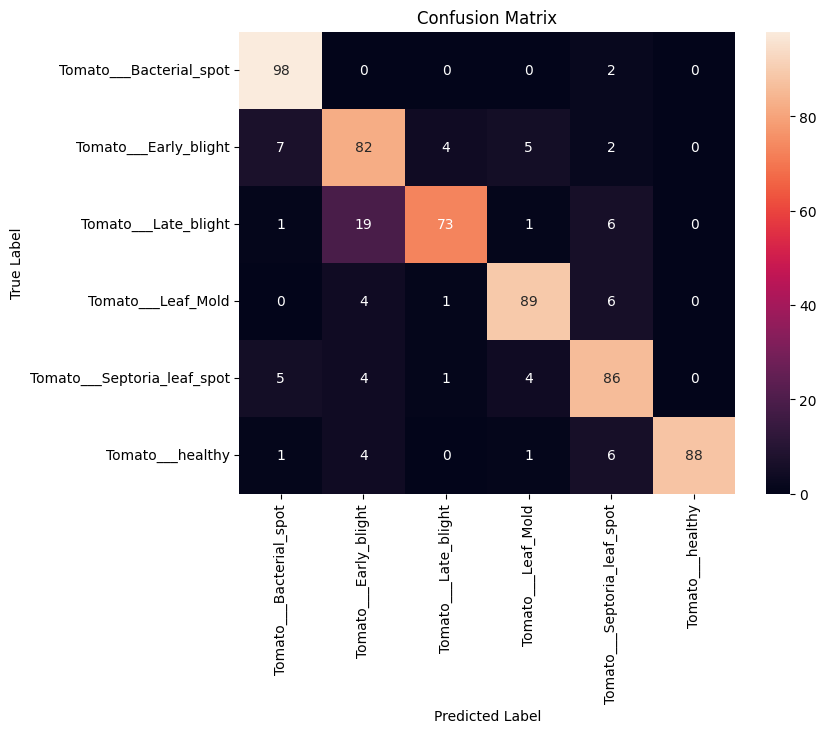

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


TESTING IMAGES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


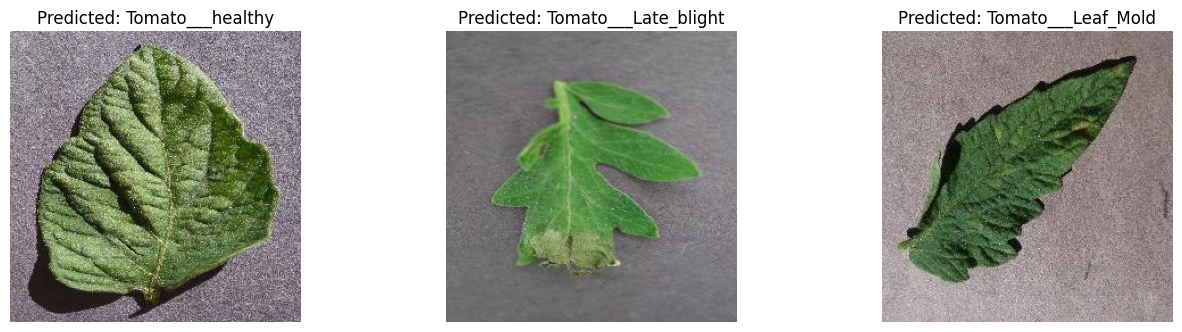

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define class labels
class_labels = list(test_generator.class_indices.keys())  # Get class names

# List of 3 image paths to test (Replace with actual image paths)
image_paths = [
    "/content/drive/MyDrive/archive/tomato/val/Tomato___healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG",
    "/content/drive/MyDrive/archive/tomato/val/Tomato___Late_blight/01ebf21e-ef94-4c92-b007-0b26741c2fc8___GHLB2 Leaf 9075.JPG",
    "/content/drive/MyDrive/archive/tomato/val/Tomato___Leaf_Mold/0ed11606-167f-4951-9a07-ffaa7e2aa88a___Crnl_L.Mold 6831.JPG"
]

# Create figure with increased spacing
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Increase figure size
plt.subplots_adjust(wspace=0.5)  # Increase space between images

for i, img_path in enumerate(image_paths):
    # Load image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize to model input size
    img_array = image.img_to_array(img) / 255.0  # Convert to array & normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for prediction

    # Predict class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get index of highest probability
    predicted_label = class_labels[predicted_class]  # Get class name

    # Display Image with Predicted Label
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {predicted_label}")
    axes[i].axis("off")

plt.show()
